In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Visit Mars site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

browser.visit(url)

In [4]:
# Parse the HTML

html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
# Read in HTML tables into a DataFrame
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')

temp_df = df[0]


In [6]:
# Display table

temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [7]:
# Display types

temp_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [8]:
#How many months exist on Mars?

temp_df['month'].nunique()

12

In [9]:
#How many days worth of data exist in the scraped dataset?

temp_df['terrestrial_date'].count()

1867

In [10]:
# What are the coldest and warmest months on Mars?

min_temp = temp_df.groupby('month').mean()
avg_min_temp = min_temp.loc[:,['min_temp']]
avg_min_temp.head()


,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725


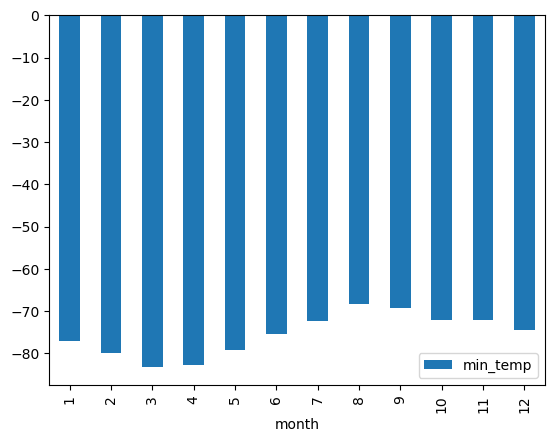

In [11]:
# Plot Results
avg_min_temp.plot.bar(y="min_temp")

plt.show()

# The coldest months are March and April
# The warmest months are August and September


In [12]:
# Which months have the lowest and highest atmospheric pressure on Mars?

atmos_press = temp_df.groupby('month').mean()
avg_atmos_press = atmos_press.loc[:,['pressure']]
avg_atmos_press.head()

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047


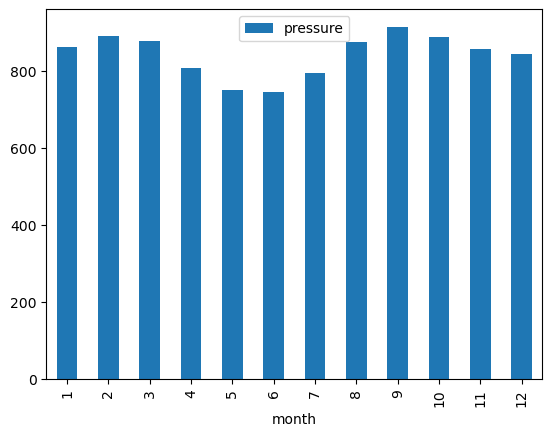

In [13]:
# Plot Results
avg_atmos_press.plot.bar(y="pressure")

plt.show()

# May and June have the Lowest atmospheric pressure
# September and October have the Highest atmospheric presure

In [16]:
# Set the output file name
output_data_file = "Mars_Temperature_Data.csv"

# Export the DataFrame into a CSV file
temp_df.to_csv(output_data_file)

In [17]:
browser.quit()